In [2]:
# Courtesy from https://github.com/derekbanas 
# pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [3]:
# print(sns.get_dataset_names())
crash_df = sns.load_dataset('car_crashes')
print(crash_df.head())

# tips dataset
tips = sns.load_dataset('tips')
print(tips.head())

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [6]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Seaborn
Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames.


`sns.[plot_function](data = [data], ...)`

parameters passed must match column names of `data`


##Distribution plot


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


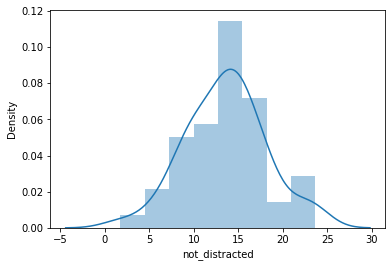

In [10]:
# Look at univariate distribution
# histogram with kernel density estimate line
# kde = False if you want to remove kde line
sns.distplot(crash_df['not_distracted'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


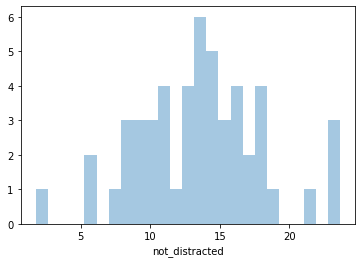

In [13]:
# adjust number of bins to 25, remove density line
sns.distplot(crash_df['not_distracted'], kde = False, bins = 25)

## Joint plot
Compare 2 distribution

Receive data on x-axis to see if the person was speeding, and if the person was drunk-driving in y-axis

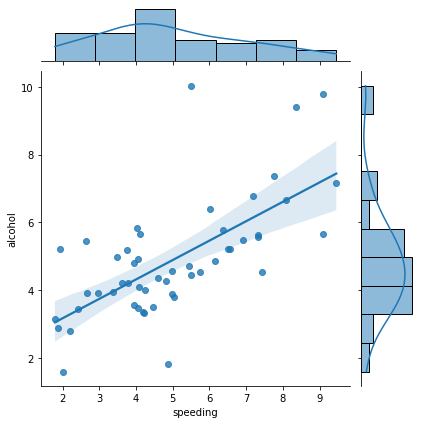

In [17]:
# generate a regression line with kind parameter (kind = 'reg')
sns.jointplot(data = crash_df, x = 'speeding', y = 'alcohol', kind = 'reg')

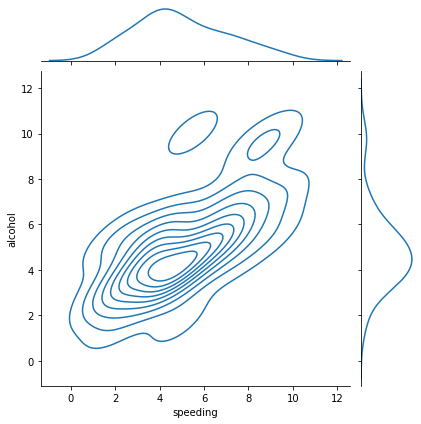

In [18]:
# generate a density line with kind parameter (kind = 'kde')
sns.jointplot(data = crash_df, x = 'speeding', y = 'alcohol', kind = 'kde')

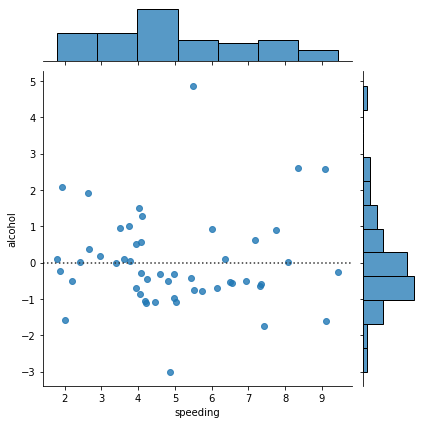

In [19]:
# generate a residual plot
sns.jointplot(data = crash_df, x = 'speeding', y = 'alcohol', kind = 'resid')

In [2]:
# Another example with categorical data
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


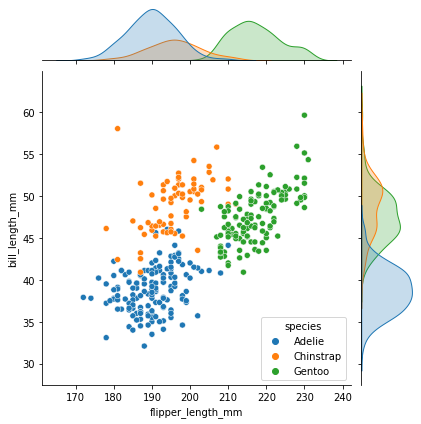

In [20]:
# to compare flipper length and bill length
# distinguished by species of penguins
# indicate 'hue' parameter to separate data according to the categories in 'species'
sns.jointplot(data = penguins, x = 'flipper_length_mm', y = 'bill_length_mm', hue = 'species')

## Kernel Density Estimate plot


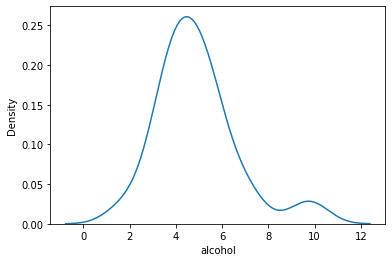

In [21]:
sns.kdeplot(crash_df['alcohol'])

## Pair plot

Compare every pair of numerical variables in the dataset

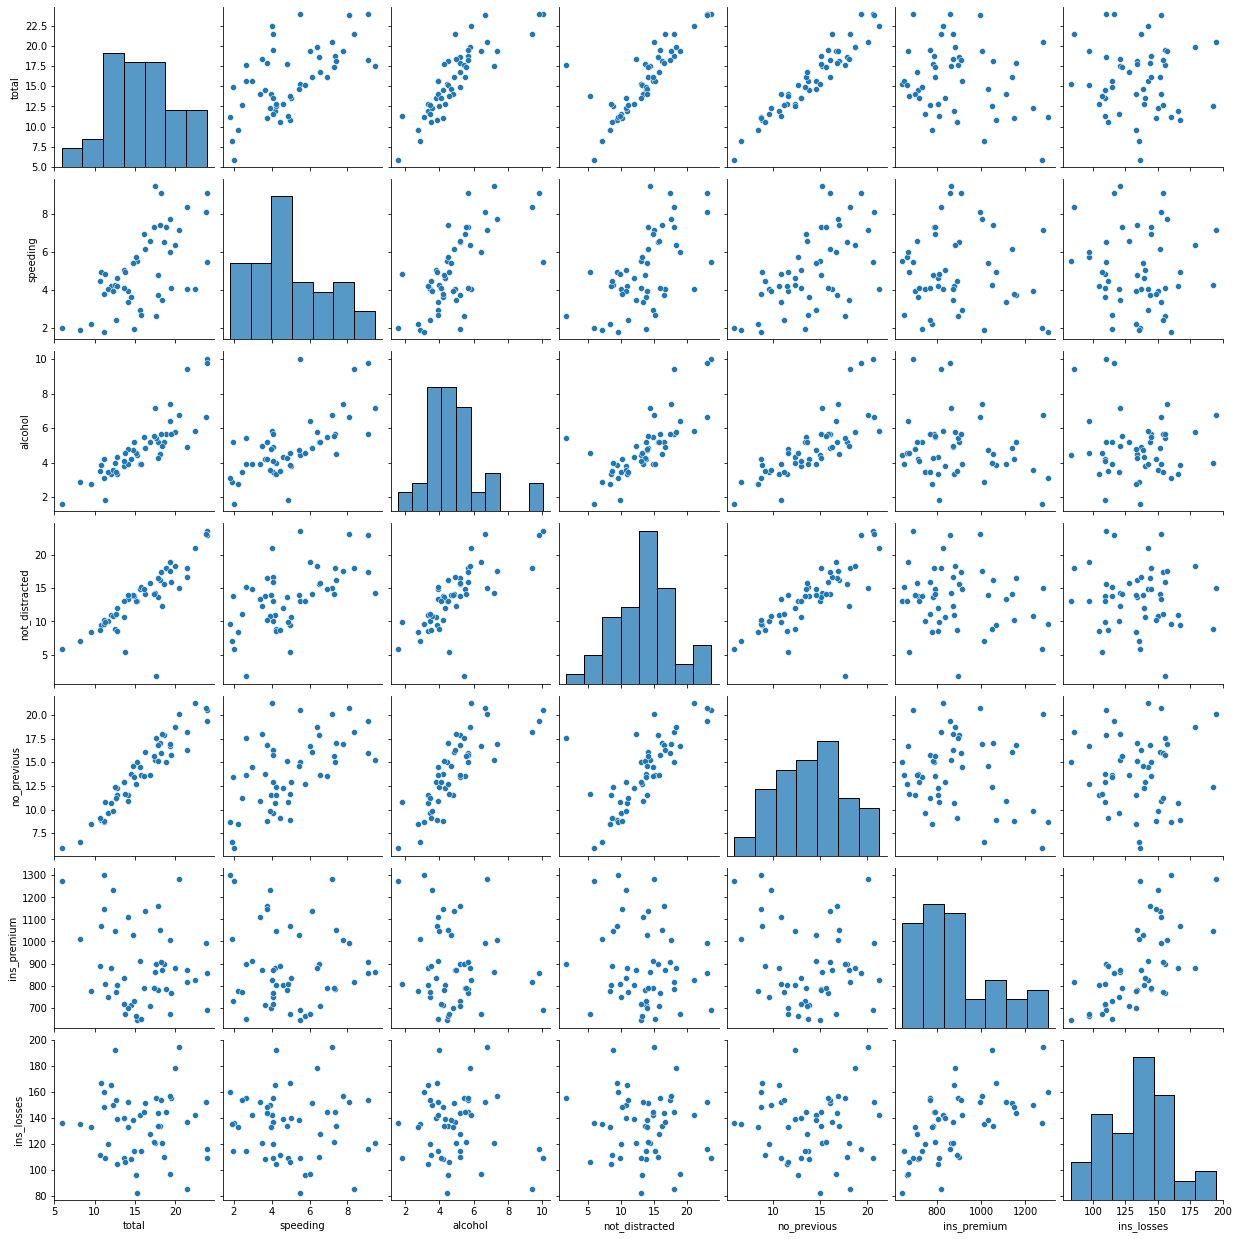

In [ ]:
sns.pairplot(crash_df)

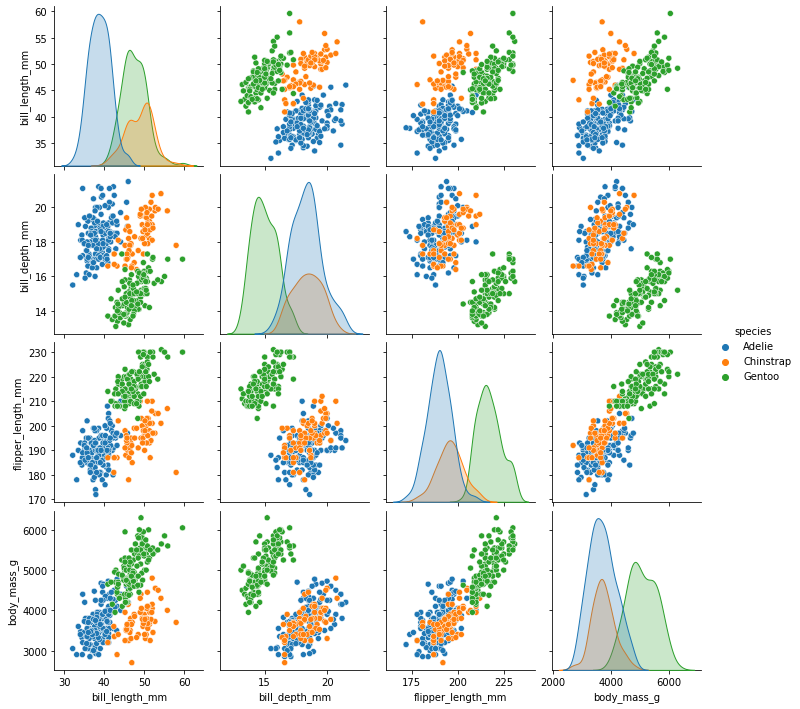

In [ ]:
# Example with categorical data distinguished by color
# color palette can be set by 'palette' parameter
sns.pairplot(penguins, hue = 'species')

## Rug plot

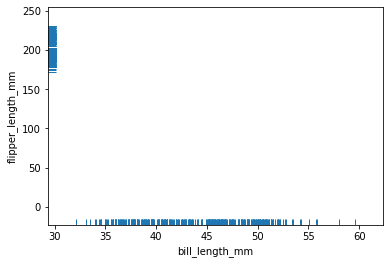

In [22]:
sns.rugplot(data = penguins, x = 'bill_length_mm', y = 'flipper_length_mm')
# sns.rugplot(data = penguins['bill_length_mm'])

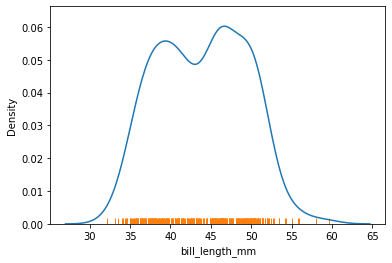

In [3]:
# rugplot usually combined with density plot or scatter plot

# We can add a second plot to rugplot by first creating a plot then calling the rug plot. 
# Here we add the kdeplot then call rugplot afterwards.
sns.kdeplot(data = penguins, x = 'bill_length_mm')
sns.rugplot(data = penguins, x = 'bill_length_mm')

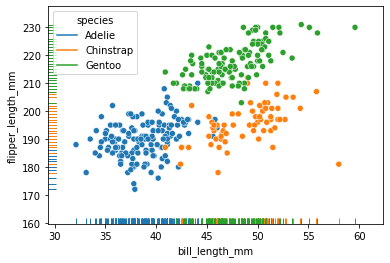

In [4]:
# rug plot with scatter plot
sns.scatterplot(data = penguins, x = 'bill_length_mm', y = 'flipper_length_mm', hue = 'species')
sns.rugplot(data = penguins, x = 'bill_length_mm', y = 'flipper_length_mm', hue = 'species')

## Styling

- `sns.set_style` : white, darkgrid, whitegrid, dark, ticks
- `sns.set_context` : talk, paper, poster
- `sns.despine()` : to remove the axis spine on plot

<Figure size 576x288 with 0 Axes>

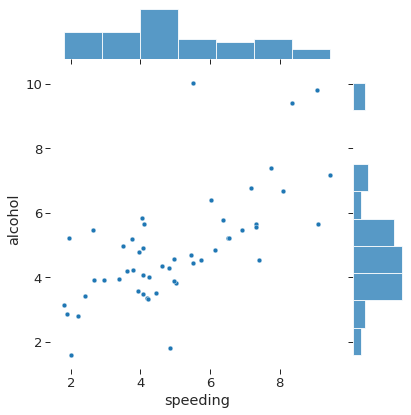

In [11]:
sns.set_style('ticks')
sns.set_context('paper', font_scale = 1.5)


plt.figure(figsize = (8,4) )
sns.jointplot(data = crash_df, x = 'speeding', y = 'alcohol')
sns.despine(left = True, bottom = True)

# Categorical plot
- Barplot
- Count plot
- Boxplot
- Violin plot

In [12]:
# let's try with another dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


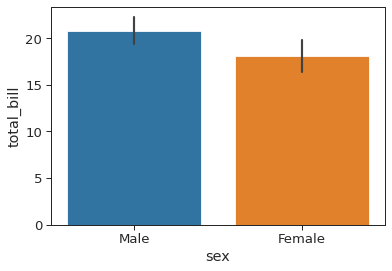

In [14]:
# visualize the total_bill collected by female and male
# by default, the data is aggregated based on mean

sns.barplot(data = tips, x = 'sex', y = 'total_bill')

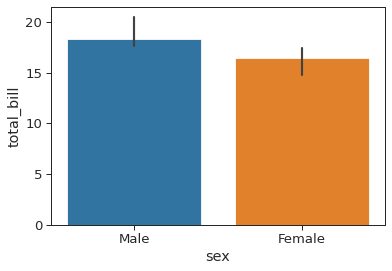

In [ ]:
# to change: 'estimator' = np.median 
# 'estimator' can use any numpy function, eg. np.var, np.std, np.cov, or make your own function

sns.barplot(data = tips, x = 'sex', y = 'total_bill', estimator = np.median)

## Count plot

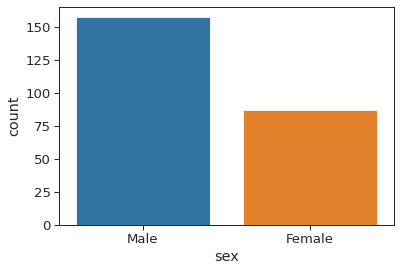

In [15]:
# find number of males and females
sns.countplot(data = tips, x = 'sex') 

## Box plot

Show quartile of data

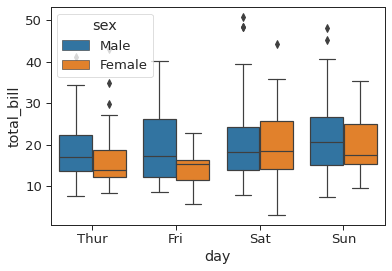

In [16]:
# how men and women change in regards to total_bill over the different days
# the line in the middle is median
# the box extends 1 standard deviation
# the horizontal bar at top and bottom (whiskers) extend to the data outside of the std, without data points considered outliers
sns.boxplot(data = tips, x = 'day', y = 'total_bill', hue = 'sex')

## Violin plot
Combination of boxplot and density plot

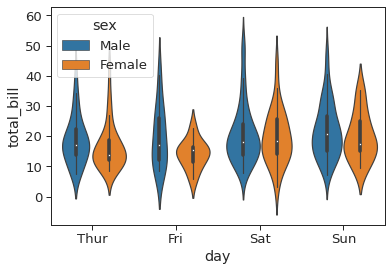

In [17]:
sns.violinplot(data = tips, x = 'day', y = 'total_bill', hue = 'sex')

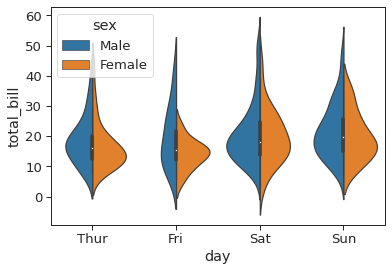

In [ ]:
sns.violinplot(data = tips, x = 'day', y = 'total_bill', hue = 'sex', split = 'True')

## Dot plot / Strip plot



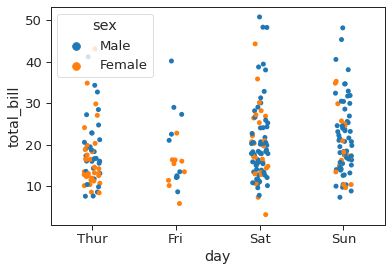

In [ ]:
# jitter is to introduce noise, so that the dots can be distinguished from each other
sns.stripplot(data = tips, x = 'day', y = 'total_bill', hue = 'sex')

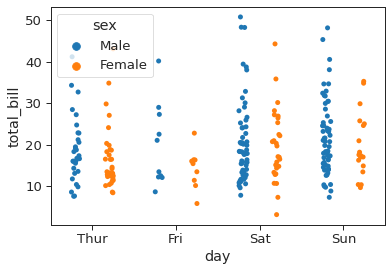

In [18]:
# add jitter
# add dodge
sns.stripplot(data = tips, x = 'day', y = 'total_bill', hue = 'sex', jitter = True, dodge = True)

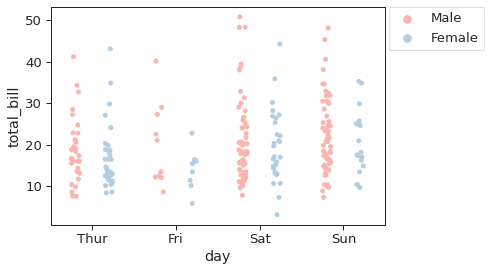

In [22]:
# adjusting color palette
# from https://matplotlib.org/stable/tutorials/colors/colormaps.html 

# change color palette for the above plot
sns.stripplot(data = tips, x = 'day', y = 'total_bill', hue = 'sex', jitter = True, dodge = True, palette = 'Pastel1')

# changing legend box position
# https://www.statology.org/seaborn-legend-position/
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0 )

# Matrix plot
- Heat map
- Cluster map
- Facet grid

## Heatmap
- Data needs to be in "matrix format": columns has to line up with 'columns' in the row, not index
- Data can be 'converted' into matrix format by getting pair wise correlation, or pivot table
- A pivot table is a table of grouped values that aggregates the individual items of a more extensive table within one or more discrete categories. This summary might include sums, averages, or other statistics, which the pivot table groups together using a chosen aggregation function applied to the grouped values. 

In [ ]:
# we need to somehow put the 'columns' into rows. The rows shouldnt be indexes (to pass the date into heatmap)
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [4]:
crash_cor = crash_df.corr()
crash_cor

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


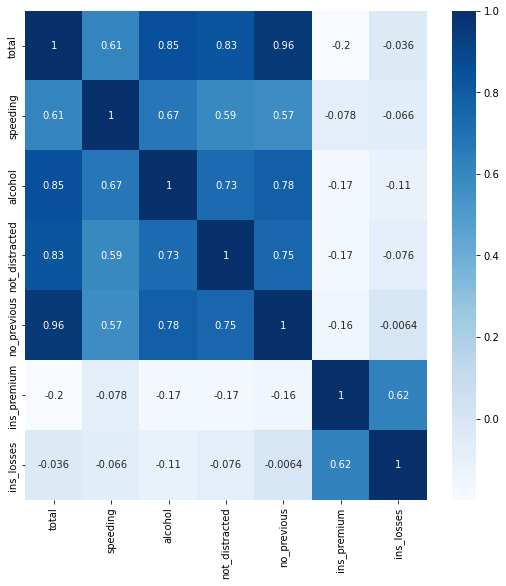

In [5]:
# annot : number inside each cell
plt.figure(figsize=(9,9))
sns.heatmap(data = crash_cor, annot = True, cmap = 'Blues')

In [6]:
# try with another dataset
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [7]:
# create pivot table that show number of passengers (values) in each month (row) aligned with each year (column)
# passed arguments have to match columns name in the datafrane
flights_matrix = flights.pivot(index = 'month', columns = 'year', values = 'passengers')
flights_matrix

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


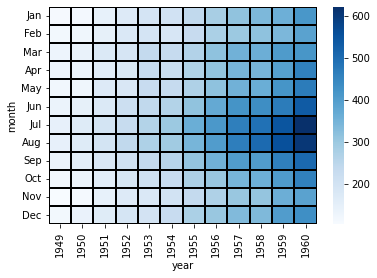

In [9]:
sns.heatmap(data = flights_matrix, cmap = 'Blues', linecolor= 'black', linewidth = 1)

## Cluster map
Hierarchically cluster the data based

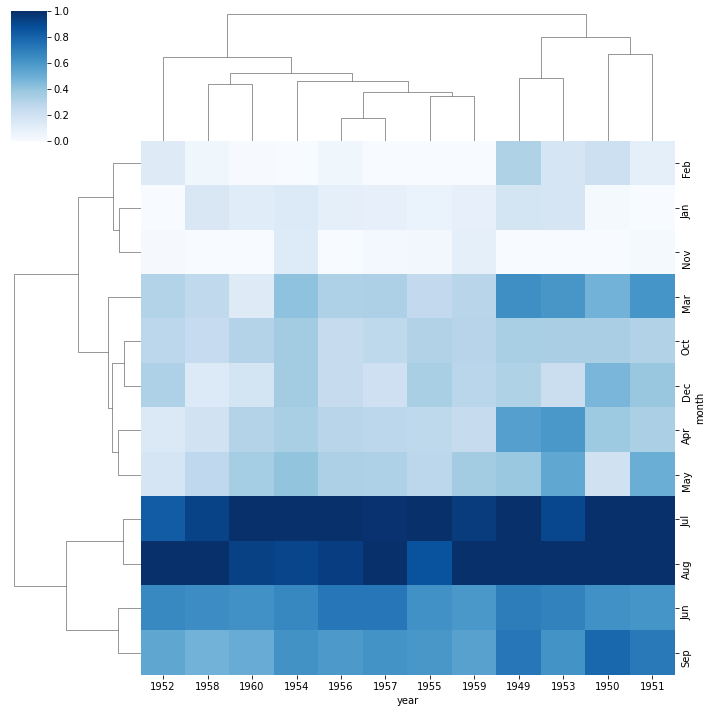

In [10]:
sns.clustermap(data = flights_matrix, cmap = 'Blues', standard_scale = 1)

# plot show clusters of flight volumn in months through the years
# The years and months are no longer in order, they are clusterred to show specific patterns

## Pair grid
Similar to pair plot,
Get specific controls of what to plots on the pair plot
- `plot.map(plt.[plot function])`
- `plot.map_diag(plt.[plot function])`
- `plot.map_offdiag(plt.[plot function])`
- `plot.map_upper(plt.[plot function])`
- `plot.map_lower(plt.[plot function])`

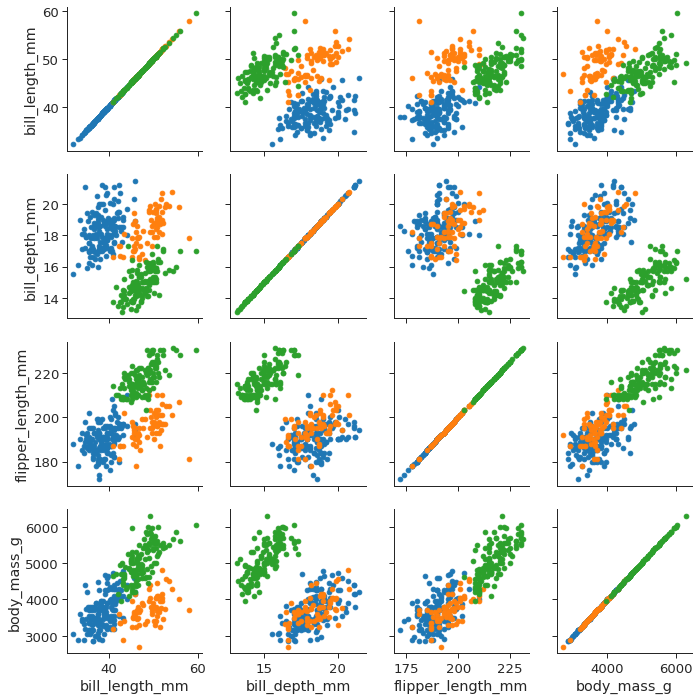

In [ ]:
# get the plot as an object

penguins_plot = sns.PairGrid(data = penguins, hue = 'species')

# plot scatter plot on upper lower and diagonal
# .map() method takes in a function
penguins_plot.map(plt.scatter)

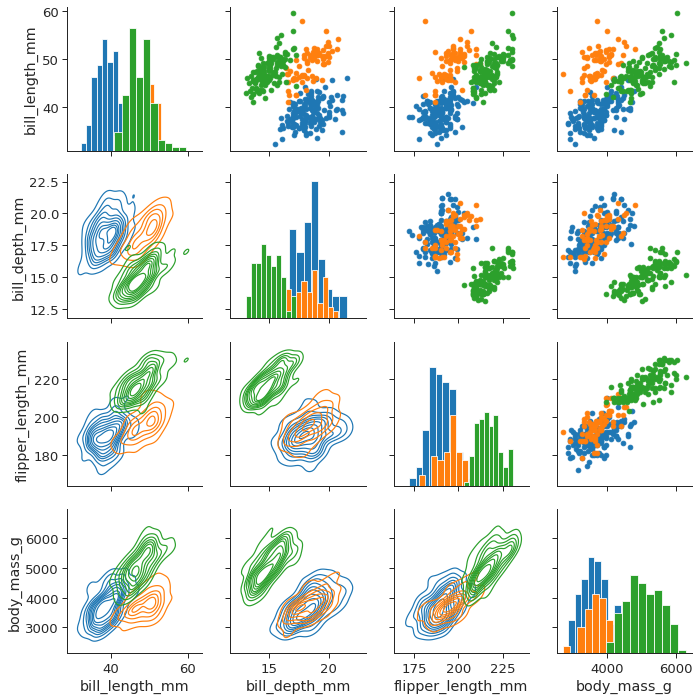

In [ ]:
# histogram on diagonal plots
# scatter plot on upper right grid
# seaborn kde plot on lower grid

penguins_plot = sns.PairGrid(data = penguins, hue = 'species')
penguins_plot.map_diag(plt.hist)
penguins_plot.map_upper(plt.scatter)
penguins_plot.map_lower(sns.kdeplot)

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


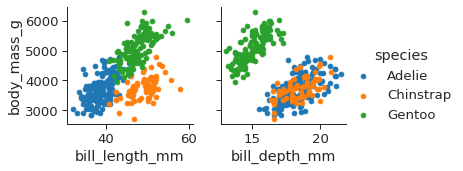

In [ ]:
# customize variables on x- and y-axis

penguins_graph = sns.PairGrid(data = penguins, hue = 'species',
                              x_vars = ["bill_length_mm", 'bill_depth_mm'],
                              y_vars = ['body_mass_g'] )

penguins_graph.map(plt.scatter)

# add legend
penguins_graph.add_legend()

## Regression line
- `sns.lmplot()`

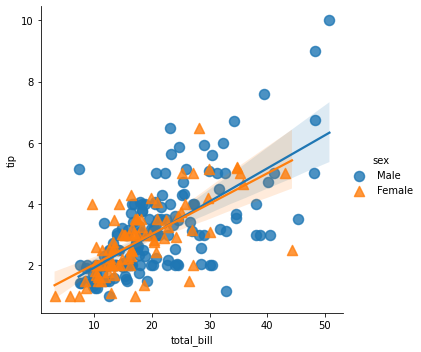

In [19]:
# whether total bill relate to tip amount
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', hue = 'sex', markers = ['o', '^'], scatter_kws = {'s' : 100, 'linewidth' : 1.5})

In [18]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


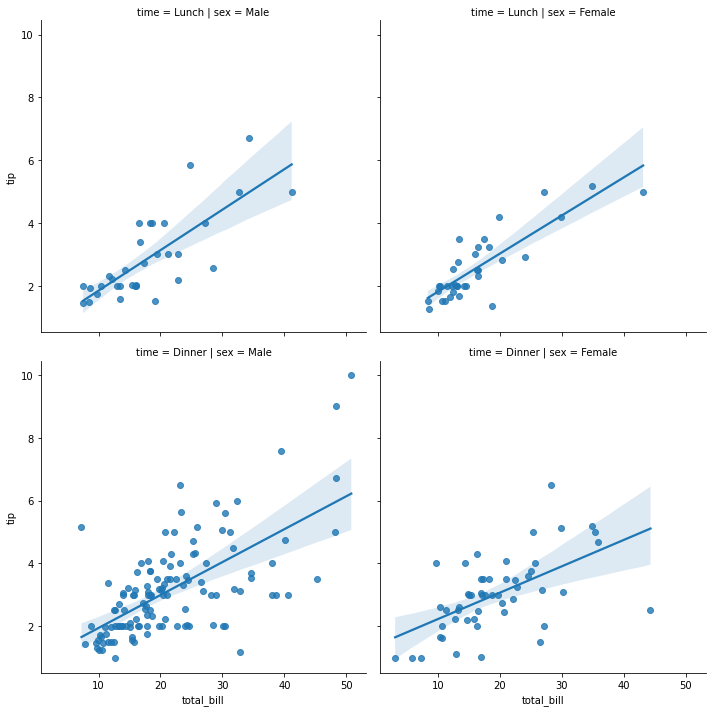

In [13]:
# split to different caterogies by column and row
sns.lmplot(data = tips, x = 'total_bill', y = 'tip',
           col = 'sex', row = 'time')